# Laplacian Blob Detector

## Algorithm outline

1. Generate a Laplacian of Gaussian filter.
2. Build a Laplacian scale space, starting with some initial scale and going for n iterations:
    - Filter image with scale-normalized Laplacian at current scale.
    - Save square of Laplacian response for current level of scale space.
    - Increase scale by a factor 
    - Increase scale by a factor 
3. Perform non-maximum suppression in scale space.
4. Display resulting circles at their characteristic scales.


Image shape :  (480, 640)


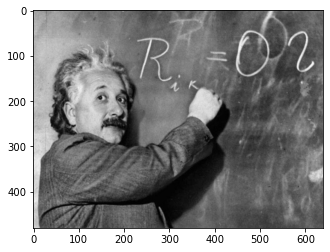

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
import time
from scipy import ndimage

img = cv2.imread('data/einstein.jpg', 0)
img1 = cv2.imread('data/einstein.jpg')
img = img/255
print('Image shape : ',img.shape)
plt.imshow(img, cmap = 'gray')
plt.show()

In [5]:
def calcSigma(no_s,k,s):
    sigma = []
    for i in range(no_s):
        sigma1 = s*(k**i)
        sigma.append(sigma1)

    h = [round(i*6) for i in sigma]
    for i in range(len(h)):
        if h[i]%2 == 0:
            h[i] = h[i]+1
    return sigma,h

In [6]:
def calcLoG(sigma,no_s,h):
    LoG = []
    for i in range(no_s):
        LoG1 = np.zeros((h[i],h[i]))
        r1 = int(-(math.floor(h[i]/2)))
        r2 = int(math.floor(h[i]/2))
        for x in range(r1,r2+1):
            for y in range(r1,r2+1):
                LoG1[x+r2,y+r2] = (-1/(math.pi*(sigma[i]**2)))*(1-(((x**2)+(y**2))/(2*(sigma[i]**2))))*np.exp(-((x**2)+(y**2))/(2*(sigma[i]**2)))
        LoG.append(LoG1)
    return LoG

In [7]:
def convPadded(image, Filter,no_s,h):
    start = time.time()
    row = image.shape[0]
    col = image.shape[1]
    convout = []
    for i in range(no_s):
        Filter[i] = np.flipud(np.fliplr(Filter[i]))  
        out = np.zeros_like(image)  
        r = int(math.floor(h[i]/2))+1
        padded = np.zeros((row + h[i]+1, col + h[i]+1))   
        padded[r:-r, r:-r] = image
        for x in range(row): 
            for y in range(col):
                out[x,y]=(Filter[i]*padded[x:x+h[i],y:y+h[i]]).sum()  
        convout.append(out)
    end = time.time()
    print('Time taken for convolution : ', end-start)
    return convout 

In [8]:
def convInbuilt(img,LoG,no_s):
    start = time.time()
    convout = []
    for i in range(no_s): 
        out = np.zeros_like(img)
        out = ndimage.convolve(img,LoG[i],mode = 'constant')
        convout.append(out)
    end = time.time()
    print('Time taken for convolution : ', end-start)
    return convout

In [9]:
def maximaDetection(img,convout,sigma,no_s,threshold):
    start1 = time.time()
    row = img.shape[0]
    col = img.shape[1]
    blob_loc = []
    no_minimas = 0
    for n in range(no_s):
        blob = []
        rad = int(math.sqrt(2)*sigma[n])
        for x in range(row):
            for y in range(col):
                temp = 'minima'
                for o in range(-1,2):
                    for i in range(-1,2):
                        for j in range(-1,2):
                            if x+i >= 0 and y+j >= 0 and x+i < row and y+j < col and n+o >= 0 and n+o < no_s:
                                if convout[n][x,y] > threshold:
                                    if convout[n][x,y] < convout[n+o][x+i,y+j]: temp = 'not minima'   
                                else: temp = 'not minima'
                if temp == 'minima':
                    if x-rad > 0 and y-rad > 0 and x-rad < row and y-rad < col:
                        blob.append([x,y])
                        cv2.circle(img, (y, x), rad, (0,0,255), 1)
        print('No of minimas in scale space', n,': ',len(blob))
        no_minimas = no_minimas + len(blob)
        blob_loc.append(blob)
    end1 = time.time()
    print('Time taken for maxima reduction : ', end1-start1)
    print('Total no. of minimas : ', no_minimas)
    return img,blob_loc
# print(blob_loc)

In [ ]:
no_s = 15
k = 1.24
s = 1/math.sqrt(2)
threshold = 0.01

sigma,h = calcSigma(no_s,k,s)
LoG = calcLoG(sigma,no_s,h)

for i in range(no_s):
    print(np.sum(LoG[i]))
    print(LoG[i].shape)
    plt.imshow(LoG[i])
    plt.show()

Time taken for convolution :  21.190253973007202
(480, 640)


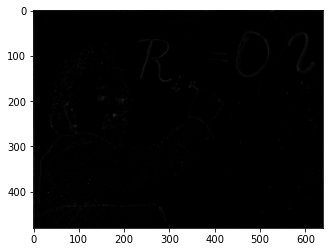

(480, 640)


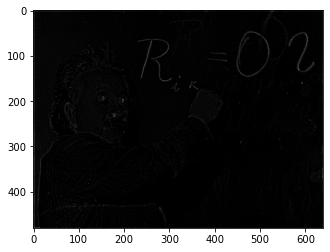

(480, 640)


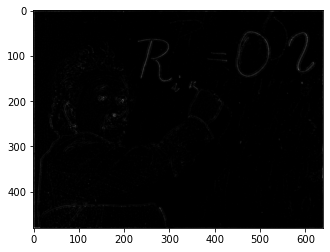

(480, 640)


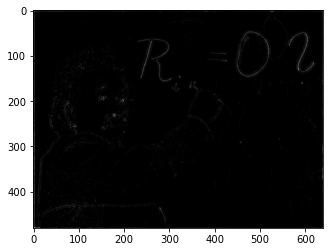

(480, 640)


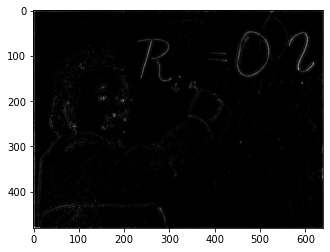

(480, 640)


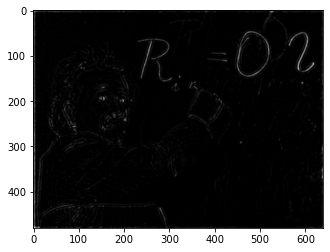

(480, 640)


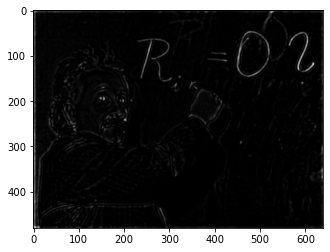

(480, 640)


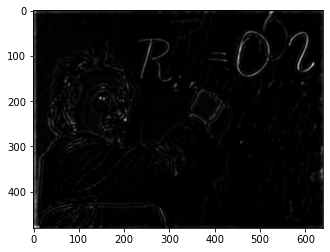

(480, 640)


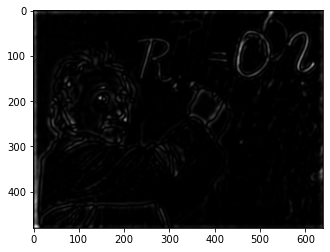

(480, 640)


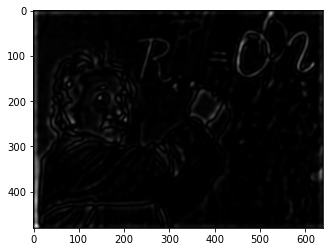

(480, 640)


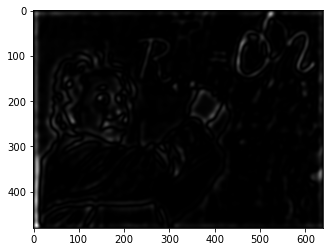

(480, 640)


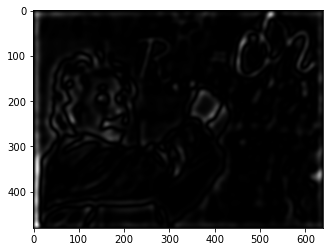

(480, 640)


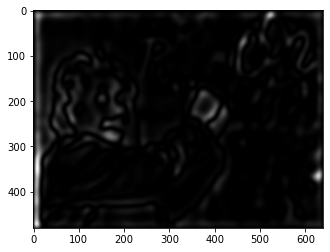

(480, 640)


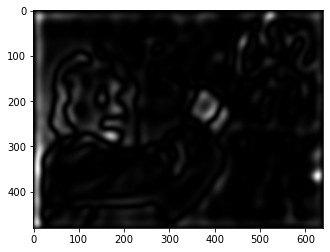

(480, 640)


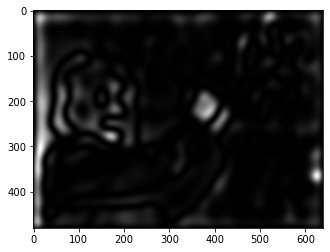

In [13]:
convout = convPadded(img,LoG,no_s,h)
# convout = convInbuilt(img,LoG,no_s)

for i in range(no_s):
    convout[i] = np.square(convout[i])
#     print(convout[i])
    print(convout[i].shape)
    plt.imshow(convout[i],cmap="gray")
    plt.show()

In [2]:
# no_of_bins, bins, patches = plt.hist(convout[0])
# print(no_of_bins)
# print(bins)

NameError: name 'convout' is not defined

In [14]:
img1,blob_loc = maximaDetection(img1,convout,sigma,no_s,threshold)

No of minimas in scale space 0 :  14
No of minimas in scale space 1 :  180
No of minimas in scale space 2 :  12
No of minimas in scale space 3 :  228
No of minimas in scale space 4 :  136
No of minimas in scale space 5 :  132
No of minimas in scale space 6 :  297
No of minimas in scale space 7 :  90
No of minimas in scale space 8 :  87
No of minimas in scale space 9 :  85
No of minimas in scale space 10 :  32
No of minimas in scale space 11 :  39
No of minimas in scale space 12 :  17
No of minimas in scale space 13 :  10
No of minimas in scale space 14 :  30
Time taken for maxima reduction :  57.85659670829773
Total no. of minimas :  1389


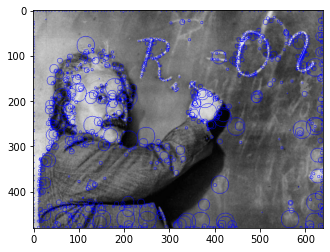

Time taken for the complete program =  7260.477368593216 sec


In [15]:
plt.imshow(img1)
plt.show()
cv2.imwrite('einstein-blobs.png',img1)
# plt.savefig('sunflowers_blob')
print('Time taken for the complete program = ', time.time() - START, 'sec')